In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(data)
df

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
...,...,...,...,...,...,...,...,...,...,...,...,...
16052,06/22/2018 04:00:00 AM,Brooklyn Bridge,7,4,3,partly-cloudy-night,67.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16053,07/19/2018 06:00:00 AM,Brooklyn Bridge,192,89,103,clear-day,65.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16054,06/16/2018 04:00:00 PM,Brooklyn Bridge,2623,1161,1462,clear-day,82.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
16055,07/24/2018 06:00:00 PM,Brooklyn Bridge,2016,1069,947,partly-cloudy-day,80.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


1) Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

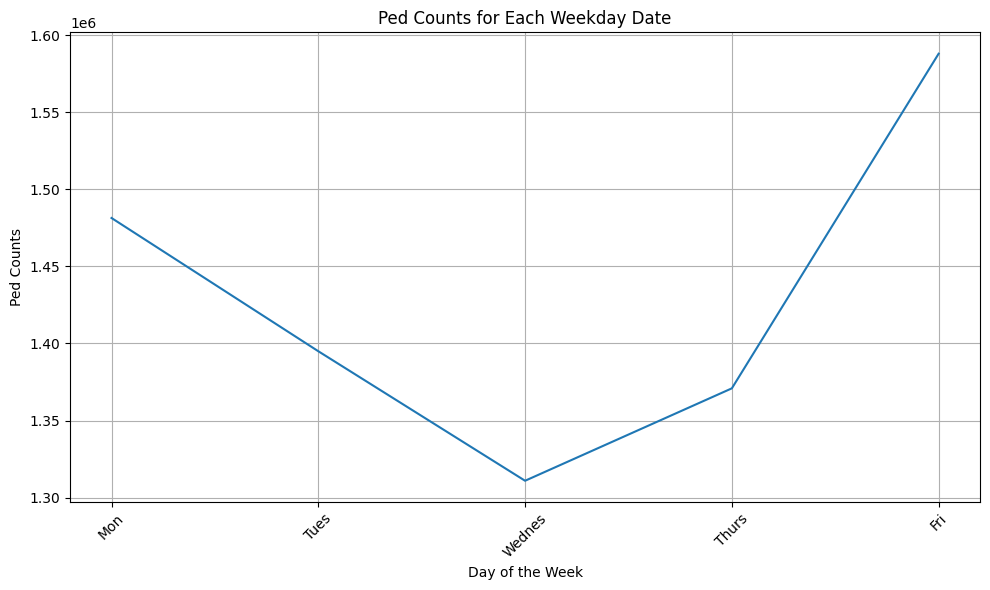

In [20]:
#convert column to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

#filter to have only weekdays
weekdays_df = df[df['hour_beginning'].dt.dayofweek < 5]

#group by day of the week and sum ped counts
grouped_df = weekdays_df.groupby(weekdays_df['hour_beginning'].dt.dayofweek)['Pedestrians'].sum()

#map day of week to day names
day_names = ['Mon', 'Tues', 'Wednes', 'Thurs', 'Fri']
grouped_df.index = grouped_df.index.map(lambda x: day_names[x])

#line graph
plt.figure(figsize=(10, 6))
plt.plot(grouped_df.index, grouped_df.values)
plt.title('Ped Counts for Each Weekday Date')
plt.xlabel('Day of the Week')
plt.ylabel('Ped Counts')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2) Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

<ipython-input-31-c4a2583e233b>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_2019[['Pedestrians', 'weather_summary']].corr()


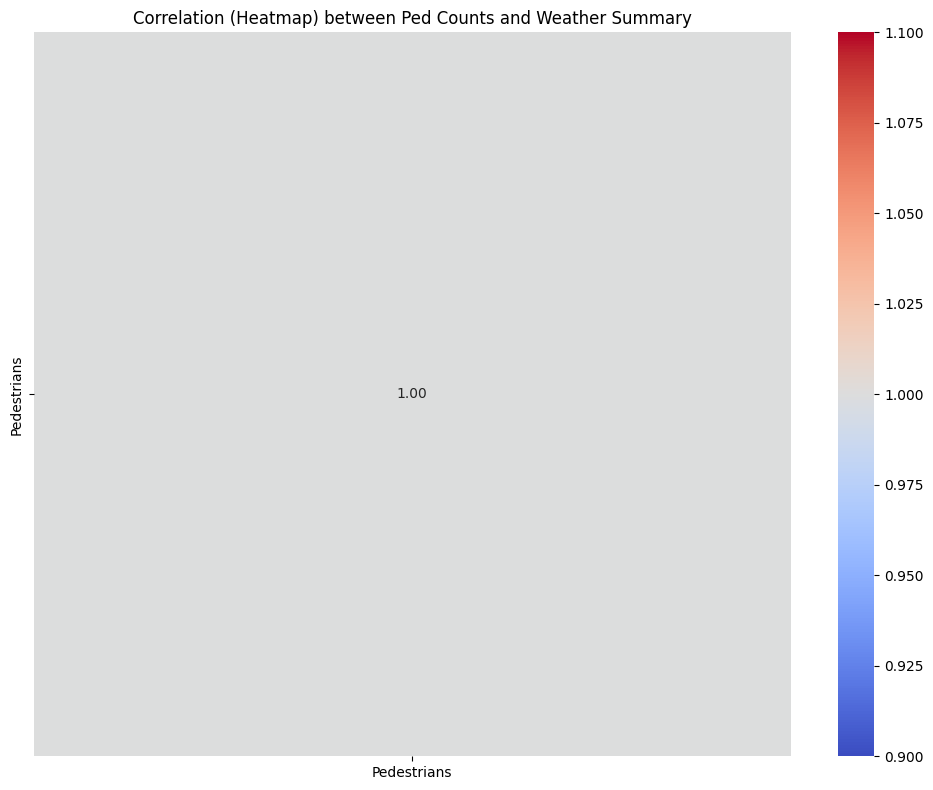

In [31]:
#using datetime conversion from above, filter for 2019
df_2019 = df[df['hour_beginning'].dt.year==2019]

#group data and calc total ped counts
summary_counts_df = df_2019.groupby('weather_summary')['Pedestrians'].sum().reset_index()

#correlation
correlation = df_2019[['Pedestrians', 'weather_summary']].corr()

#plot using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation (Heatmap) between Ped Counts and Weather Summary')
plt.tight_layout()
plt.show()

Having a hard time fixing this one ^

3) Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

<ipython-input-33-bea279b15816>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_time_of_day, x='time_of_day', y='Pedestrians', palette='viridis')


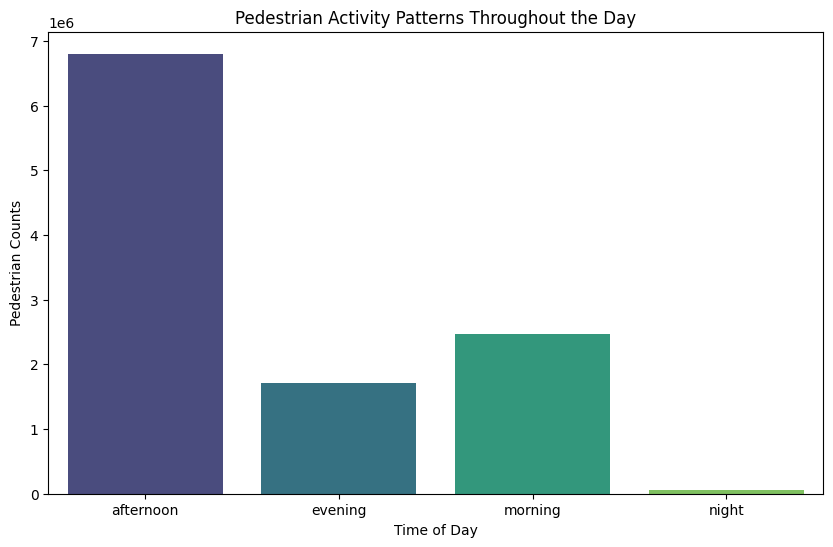

In [33]:
#using datetime conversion from above, def time of day
def what_time_of_day(hour):
    if 6 <= hour.hour < 12:
        return 'morning'
    elif 12 <= hour.hour < 18:
        return 'afternoon'
    elif 18 <= hour.hour < 24:
        return 'evening'
    else:
        return 'night'

# Create a new column 'time_of_day' to store the categories
df['time_of_day'] = df['hour_beginning'].apply(what_time_of_day)

# Group data by time of day and calculate total pedestrian counts
df_time_of_day = df.groupby('time_of_day')['Pedestrians'].sum().reset_index()

# Plot pedestrian activity patterns throughout the day
plt.figure(figsize=(10, 6))
sns.barplot(data=df_time_of_day, x='time_of_day', y='Pedestrians', palette='viridis')
plt.title('Pedestrian Activity Patterns Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Counts')
plt.show()